In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import pickle

## Data Loading

In [2]:
df = pd.read_csv("dataset/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## Data Cleaning

In [7]:
df_not_null = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

In [8]:
df_not_null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [9]:
df_not_null.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [10]:
df_not_null.fillna(df.mean(), inplace=True)

C:\Users\umam1\AppData\Local\Temp\ipykernel_35108\1994305390.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_not_null.fillna(df.mean(), inplace=True)


In [11]:
df_not_null['RainToday'].fillna(df_not_null['RainToday'].mode()[0], inplace=True)
df_not_null['RainTomorrow'].fillna(df_not_null['RainTomorrow'].mode()[0], inplace=True)

In [12]:
df_not_null.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df_not_null.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


## Explorasi Data

<AxesSubplot:>

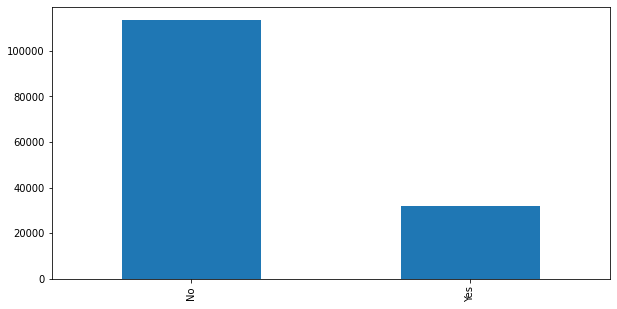

In [14]:
df_not_null['RainToday'].value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

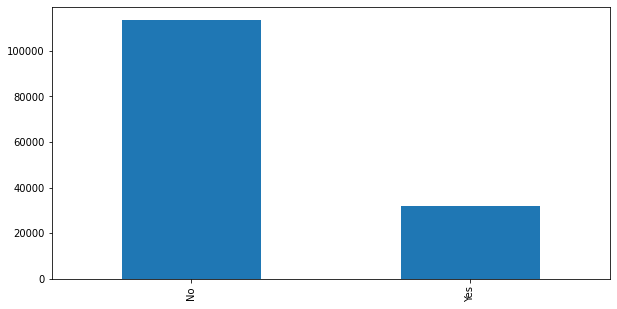

In [15]:
df_not_null['RainTomorrow'].value_counts().plot(kind='bar', figsize=(10,5))

c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

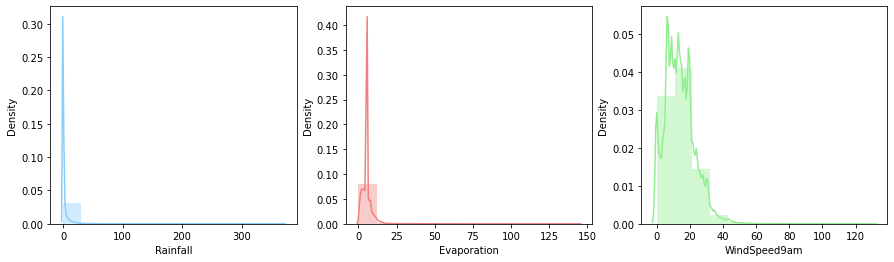

In [16]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

sns.distplot(df_not_null["Rainfall"],bins=12,color="lightskyblue",ax=axes[0])
sns.distplot(df_not_null["Evaporation"],bins=12,color="lightcoral",ax=axes[1])
sns.distplot(df_not_null["WindSpeed9am"],bins=12,color="lightgreen",ax=axes[2])

<AxesSubplot:xlabel='Evaporation', ylabel='RainToday'>

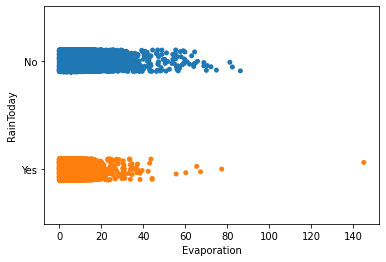

In [17]:
sns.stripplot(data=df_not_null, x='Evaporation', y='RainToday')

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

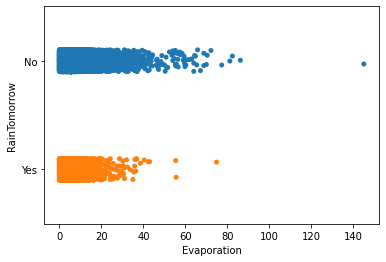

In [18]:
sns.stripplot(data=df_not_null, x='Evaporation', y='RainTomorrow')

## Data Preprocessing

In [19]:
df_not_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustSpeed  145460 non-null  float64
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Cloud9am       145460 non-null  float64
 13  Cloud3pm       145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

In [20]:
le = preprocessing.LabelEncoder()

In [21]:
df_not_null['RainToday'] = le.fit_transform(df_not_null['RainToday'])
df_not_null['RainTomorrow'] = le.fit_transform(df_not_null['RainTomorrow'])

<AxesSubplot:>

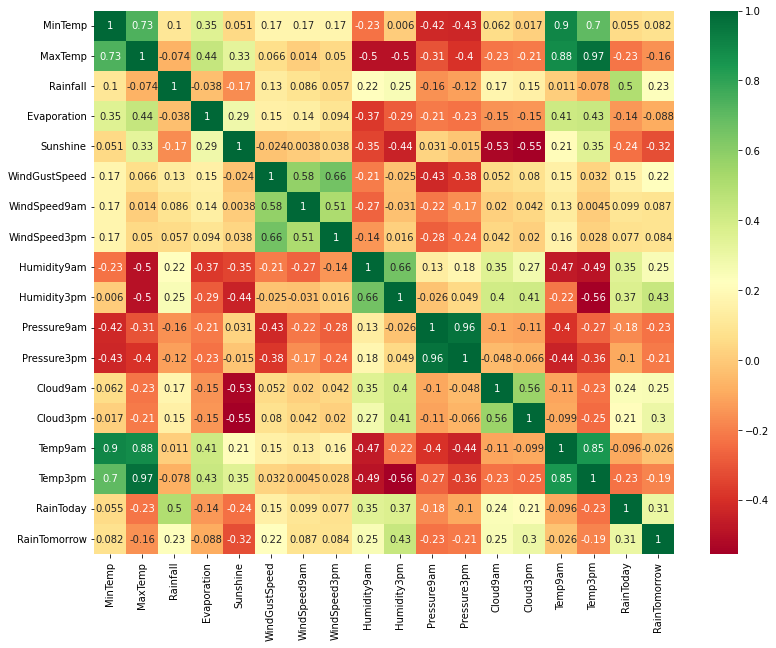

In [22]:
corr = df_not_null.corr()
top_corr = corr.index
plt.figure(figsize=(13,10))
sns.heatmap(df_not_null[top_corr].corr(),annot=True,cmap="RdYlGn")

In [23]:
df_pred = df_not_null[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']]

In [24]:
df_pred

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,44.00000,71.0,22.0,8.000000,4.50993,0,0
1,0.0,44.00000,44.0,25.0,4.447461,4.50993,0,0
2,0.0,46.00000,38.0,30.0,4.447461,2.00000,0,0
3,0.0,24.00000,45.0,16.0,4.447461,4.50993,0,0
4,1.0,41.00000,82.0,33.0,7.000000,8.00000,0,0
...,...,...,...,...,...,...,...,...
145455,0.0,31.00000,51.0,24.0,4.447461,4.50993,0,0
145456,0.0,22.00000,56.0,21.0,4.447461,4.50993,0,0
145457,0.0,37.00000,53.0,24.0,4.447461,4.50993,0,0
145458,0.0,28.00000,51.0,24.0,3.000000,2.00000,0,0


In [25]:
df_pred.describe()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,2.360918,40.035230,68.880831,51.539116,4.447461,4.509930,0.219167,0.219146
std,8.382488,13.118253,18.854765,20.471189,2.265604,2.092954,0.413683,0.413669
min,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,57.000000,37.000000,3.000000,4.000000,0.000000,0.000000
50%,0.000000,39.000000,69.000000,51.539116,4.447461,4.509930,0.000000,0.000000
75%,1.000000,46.000000,83.000000,65.000000,6.000000,6.000000,0.000000,0.000000
max,371.000000,135.000000,100.000000,100.000000,9.000000,9.000000,1.000000,1.000000


## Pendefinisian Model

In [26]:
x = df_pred.drop("RainTomorrow", axis=1)
y = df_pred["RainTomorrow"]

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
x

array([[-2.10071794e-01,  3.02234118e-01,  1.12394715e-01, ...,
         1.56803670e+00, -8.48734694e-16, -5.29795450e-01],
       [-2.81649838e-01,  3.02234118e-01, -1.31960895e+00, ...,
        -3.92028479e-16, -8.48734694e-16, -5.29795450e-01],
       [-2.81649838e-01,  4.54693970e-01, -1.63783199e+00, ...,
        -3.92028479e-16, -1.19923244e+00, -5.29795450e-01],
       ...,
       [-2.81649838e-01, -2.31375364e-01, -8.42274396e-01, ...,
        -3.92028479e-16, -8.48734694e-16, -5.29795450e-01],
       [-2.81649838e-01, -9.17444698e-01, -9.48348741e-01, ...,
        -6.38887439e-01, -1.19923244e+00, -5.29795450e-01],
       [-2.81649838e-01,  0.00000000e+00, -3.64939841e-01, ...,
         1.56803670e+00,  1.66753850e+00, -5.29795450e-01]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

print("Shape Training Feature:", X_train.shape)
print("Shape Testing Feature:", X_test.shape)
print("Shape Training Feature:", y_train.shape)
print("Shape Testing Feature:", y_test.shape)

Shape Training Feature: (116368, 7)
Shape Testing Feature: (29092, 7)
Shape Training Feature: (116368,)
Shape Testing Feature: (29092,)


## Logistic Regression

In [30]:
log = LogisticRegression(solver="liblinear", random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [31]:
print('Cofficients (b) : ', log.coef_)
print('Intercept (a) : ', log.intercept_)

Cofficients (b) :  [[0.1113764  0.56658115 0.05483622 1.05119511 0.09936724 0.37067074
  0.19342394]]
Intercept (a) :  [-1.8008693]


In [32]:
log.score(X_test, y_test)

0.834662450158119

In [33]:
ypred = log.predict(X_test)

In [34]:
print("r2 Score : ", r2_score(y_test, ypred))
print("MAE Score : ", mean_absolute_error(y_test, ypred))
print("RMSE Score : ", np.sqrt(mean_squared_error(y_test, ypred)))

r2 Score :  0.03862285289662459
MAE Score :  0.16533754984188093
RMSE Score :  0.4066172030815727


In [35]:
print(classification_report(y, log.predict(x)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90    113583
           1       0.71      0.44      0.54     31877

    accuracy                           0.84    145460
   macro avg       0.78      0.69      0.72    145460
weighted avg       0.82      0.84      0.82    145460



In [36]:
num_obs = len(df_not_null)
num_true = len(df_not_null.loc[df_not_null['RainTomorrow'] == 1])
num_false = len(df_not_null.loc[df_not_null['RainTomorrow'] == 0])
print("Jumlah Turun Hujan : {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs)*100))
print("Jumlah Tidak Turun Hujan : {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs)*100))

Jumlah Turun Hujan : 31877 (21.91%)
Jumlah Tidak Turun Hujan : 113583 (78.09%)


In [37]:
from sklearn import metrics

C_start = 0.1
C_end = 5
C_inc = 0.1
C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append (C_val)
    lr_model_loop = LogisticRegression(C =C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict (X_test)
    recall_score = metrics.recall_score (y_test, lr_predict_loop_test)
    recall_scores.append (recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index (best_recall_score) ]
print ("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

1st max value of 0.743 occured at C=0.100


In [38]:
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit (X_train, y_train.ravel())
lr_predict_test = lr_model.predict (X_test)

# training metrics
print ("Accuracy:{0:.4f}".format (metrics.accuracy_score(y_test, lr_predict_test)))
print (metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print (metrics.classification_report(y_test, lr_predict_test))
print (metrics.recall_score(y_test, lr_predict_test))

Accuracy:0.7670
[[17545  5127]
 [ 1652  4768]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.77      0.84     22672
           1       0.48      0.74      0.58      6420

    accuracy                           0.77     29092
   macro avg       0.70      0.76      0.71     29092
weighted avg       0.82      0.77      0.78     29092

0.7426791277258566


In [39]:
xtest = [[30,20,27,20,6,7,1]]
df_test = pd.DataFrame(xtest, columns=[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']])
pred = lr_model.predict(df_test)

c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred_1= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.8355561666437509


In [41]:
print(classification_report(y, clf.predict(x)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90    113583
           1       0.76      0.40      0.52     31877

    accuracy                           0.84    145460
   macro avg       0.80      0.68      0.71    145460
weighted avg       0.83      0.84      0.82    145460



In [42]:
xtest = [[30,20,27,20,6,7,1]]
df_test = pd.DataFrame(xtest, columns=[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']])
pred = clf.predict(df_test)

c:\Users\umam1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
pred

array([0])

In [45]:
pickle.dump(lr_model, open('lr_model.pkl','wb'))

In [46]:
pickle.dump(clf, open('clf_model.pkl','wb'))

In [47]:
X_train

array([[ 7.21018542e+00,  2.26004192e-01,  1.38528686e+00, ...,
         1.56803670e+00,  1.66753850e+00,  1.88752093e+00],
       [-2.81649838e-01, -3.83835216e-01, -3.11902668e-01, ...,
         6.85267044e-01,  1.18974335e+00, -5.29795450e-01],
       [-2.81649838e-01,  4.54693970e-01, -2.05828322e-01, ...,
        -3.92028479e-16, -8.48734694e-16, -5.29795450e-01],
       ...,
       [-2.81649838e-01, -3.83835216e-01, -4.17977013e-01, ...,
        -6.38887439e-01, -1.19923244e+00, -5.29795450e-01],
       [-2.81649838e-01, -5.36295068e-01,  5.36692097e-01, ...,
        -3.92028479e-16, -8.48734694e-16, -5.29795450e-01],
       [-2.81649838e-01, -2.31375364e-01,  1.22617534e+00, ...,
        -3.92028479e-16, -1.67702759e+00, -5.29795450e-01]])